# Week 08: Pre-Class Assignment: Regularization

### <p style="text-align: right;"> &#9989; Kyle Taft



![L1L2](https://qph.fs.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02.webp)

## Goals for this Pre-Class Assignment
- Practice regularization


Total number of points: **20 points**

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.


## Part 0: Artificial Neural Networks

&#9989; **Task:** Read chapter 10 of your textbook, including the problems at the end of the chapter and their solutions in Appendix A.


---
## Part 1: Regularization Techniques

In this problem you will learn how to use three different regularizers in the context of, you guessed it, linear regression. You will do this in 1D so that you can visualize what you have done. 


### L1 (_LASSO_) Regularization

[L1 regularization](https://en.wikipedia.org/wiki/Lasso_(statistics)) uses what we called in class the "human norm" - the Manhattan (walking on a grid) distance applied to the parameters of the model. 

### L2 (_Tikhonov, Ridge_) Regularization

[L2 regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) uses what we called in class the "bird norm" - the usual Euclidean distance applied to the parameters of the model. 

### L1 and L2 (_Elastic Net_) Regularization

Finally, if all of the above regularizers have merits, a good question is: _which one is the best one_? An even better question is: _is there a way to combine them to get a new variant that has all of the merits_? The [Elastic Net](https://en.wikipedia.org/wiki/Elastic_net_regularization) is such an approach that uses the L1 (LASSO) and L2 (Ridge) in a linear combination, thereby adding a bit of L1 behavior to L2. While the best choice always needs to be checked through validation, which is something you will explore in the context of your project, Elastic Net is probably a good place to start for any new problem you encounter. 


![pen](https://findicons.com/files/icons/766/base_software/128/pencil3.png)

&#9989; **Task: (12 points)** Read the links above and write in your own words what the differences are. Think about it in terms of problems:

1. what problem does Tikhonov solve? What are the pros and cons of using the L2 regularization?

2. what problem does L1 solve? What are the pros and cons of using the L1 regularization?

3. what problem does Elastic Net solve? What are the pros and cons of using the elastic net?


<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. As in all of these regularization techniques its goal is to improve models (in multiple ways) by regularizing the weights of the model. Ridge regression does this by adding a penalty term to the loss function that is a scaled value of the total magnitude of the weights. This adds a bias to the model to choose smaller weights rather than larger ones. This is useful because it can help prevent overfitting and can also help with multicollinearity where collinear terms will be greatly punished. The downside is that it can be computationally expensive and adds an addtional hyperparameters of scaling the loss of the weights.

2. Lasso regression is similar to ridge regression in that it adds a penalty term to the loss function that is a scaled value of the total magnitude of the weights. However, instead of using the L2 norm it uses the L1 norm. This, as can be seen in the graph above, makes a "diamond" shape instead of a circle. This causes the weights to be able to converge to exactly 0 (on a corner of the diamond). This performs variable selection for us where variables that are set to 0 can be completely dropped. This can also increase the interpretablility of the model. The downside to this over ridge regression is that some variables might be completely dropped and the model will be less accurate than if they only had a small contribution. Other issues is taht when the data has more features than observations LASSO will only select at most a number of features equal to the number of observations. Additionally if there are highly correlated features LASSO may not perform as expected.

3. Elastic net provides all the good features that LASSO and Ridge regression provide while also avoiding some of the issues that they have. It does this by adding a hyperparameter that is a combination of the L1 and L2 norms. This allows for the model to have the variable selection that LASSO provides while also not completely dropping variables that have a small contribution. It also helps with multicollinearity by not completely punishing collinear variables. The downside is that it adds another hyperparameter to tune and can be computationally expensive.


Coeff for linear: [1.06695116]
Tikhonov/L2/Ridge parameters: -1.8505719805093173 [0.96885463]
LASSO/L1 parameters: 0.4169472911738743 [0.56070116]
Elastic Net parameters: -0.07603145783583054 [0.64943733]


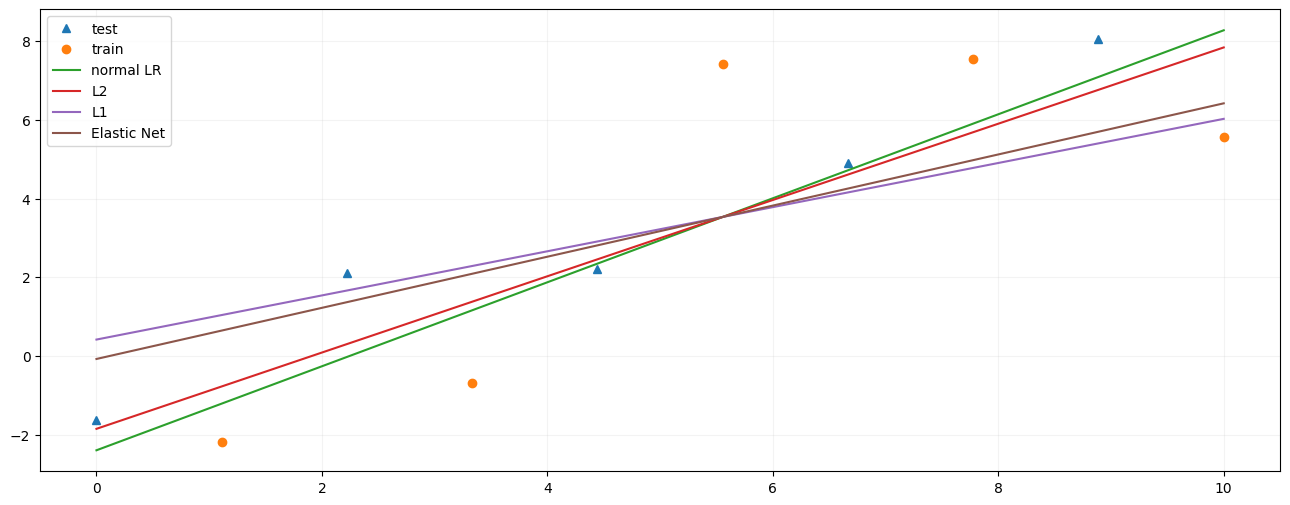

In [28]:
# basic libraries
import numpy as np
import matplotlib.pyplot as plt

# ML libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model

# control the number of samples in your fake data
num_samples = 10

# fake data
slope = 1
interp = -1.5
noise_level = 2.0
x = np.linspace(0,10, num_samples)
y = slope*x + interp + noise_level*np.random.randn(x.size)

# reshape into sklearn's desired shape
x = np.reshape(x, (x.size,-1))

# finer grid for plotting
x_fine = np.linspace(0, 10)
x_fine = np.reshape(x_fine, (x_fine.size,-1))

# split data
x_1 = x[0::2]
y_1 = y[0::2]
x_2 = x[1::2]
y_2 = y[1::2]


fig = plt.figure(figsize=(16,6))
plt.plot(x_1, y_1, '^', label='test')
plt.plot(x_2, y_2, 'o', label='train')

# First, just the basics!
linear = linear_model.LinearRegression()
linear.fit(x_2, y_2)
y_linear_pred = linear.predict(x_fine)
print('Coeff for linear:', linear.coef_)
plt.plot(x_fine, y_linear_pred, label='normal LR')

alpha = 5

# Tikhonov
ridge = Ridge(alpha = alpha)
ridge.fit(x_2,y_2)
y_ridge_pred = ridge.predict(x_fine)
print('Tikhonov/L2/Ridge parameters:', ridge.intercept_, ridge.coef_)
plt.plot(x_fine, y_ridge_pred, label='L2')

# LASSO
lasso = Lasso(alpha = alpha)
lasso.fit(x_2,y_2)
y_lasso_pred = lasso.predict(x_fine)
print('LASSO/L1 parameters:', lasso.intercept_, lasso.coef_)
plt.plot(x_fine, y_lasso_pred, label='L1')

# Elastic Net
elastic = ElasticNet(alpha = alpha, l1_ratio=0.5)
elastic.fit(x_2,y_2)
y_elastic_pred = elastic.predict(x_fine)
print('Elastic Net parameters:', elastic.intercept_, elastic.coef_)
plt.plot(x_fine, y_elastic_pred, label='Elastic Net')


plt.grid(alpha=0.15)
plt.legend()


&#9989; **Task: (8 points)** Modify the code above to include *both* Lasso and Elastic Net. 

* Run your code several times to build your intuition for whether the regularization is helping on average. That is, is the predicted line generally closer to the data you did not use in the fit. Write your comments on this below in this markdown cell. 

* Read the `sklearn` documentation on the [elastic net regularizer](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet). How many parameters does it use and how are those parameters connected to the parameters of the L2 and L1 cases? 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. The regularization does seem to help on average to not overfit granted the value of alpha is reasonable. The predicted line is generally closer to the data that was not used in the fit. This is especially true of Ridge regression but of course this could change based on hyperparameter choice.

2. The sklearn elastic net takes in two parameters: alpha and l1_ratio. alpha is the same as for Ridge and LASSO regularization. The l1_ratio is the hyperparater that determines the combination of the L1 and L2 norms. An interesting result is that with high alpha the elastic net will behave more like LASSO and with low alpha it will behave more like Ridge.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [29]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.